In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
!pip install transformers
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.1 MB/s eta 0:00:00


In [ ]:
raw_data = pd.read_csv('https://raw.githubusercontent.com/Yuji-Itadorii/Tensor-Flow-Tutorial/main/new_data.csv')

In [ ]:
data = raw_data.copy()
data

,Unnamed: 0,text,label
0,0,Imagine you were forced to work on a topic you...,0
1,1,In life there are many hard choices to make. S...,0
2,2,Many schools require children to do a summer p...,0
3,3,Firs of all I'd like to state that there has b...,0
4,4,Have you ever wanted to go to the other side o...,0
...,...,...,...
34989,34989,"Dear Senator,I am writing to you today to expr...",1
34990,34990,"Dear Senator,I am writing to you today to expr...",1
34991,34991,"Dear Senator,I am writing to you today to expr...",1
34992,34992,"Dear Senator,I am writing to you today to expr...",1


In [ ]:
data.drop(['Unnamed: 0'] , axis=1 , inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34994 entries, 0 to 34993
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    34994 non-null  object
 1   label   34994 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 546.9+ KB


([<matplotlib.patches.Wedge at 0x793c3862b580>,
 [Text(6.735557395310444e-17, 1.1, 'Ai-generated'),
  Text(-2.0206672185931328e-16, -1.1, 'Human-Generated')])

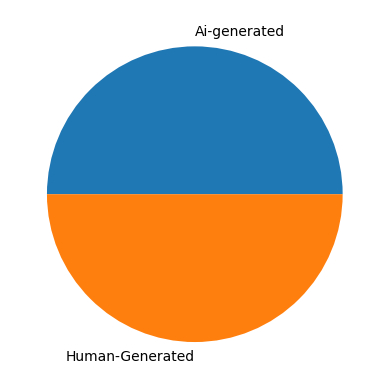

In [ ]:
counts = data.label.value_counts()
plt.pie(counts , labels=['Ai-generated' , 'Human-Generated'])

In [ ]:
x = data.text
y = data.label

In [ ]:
x = [str(i) for i in x]

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y,test_size=0.20,  random_state=42 , shuffle=True)

In [ ]:
from transformers import TFAutoModelForSequenceClassification, AutoTokenizer

model_name = "distilbert/distilbert-base-uncased-finetuned-sst-2-english"  # Example model name
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = TFAutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [ ]:
max_length = 128  # Maximum sequence length
train_encodings = tokenizer(x_train , truncation=True , padding=True , max_length=max_length)
test_encodings = tokenizer(x_test , truncation=True , padding=True , max_length=max_length)

In [ ]:
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train
)).shuffle(1000).batch(16)

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test
)).batch(16)

In [ ]:
optimizer = "sgd"
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')


In [ ]:
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])
model.fit(train_dataset, validation_data=test_dataset, epochs=3)


Epoch 1/3


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1750/1750 [==============================] - 454s 235ms/step - loss: 0.1201 - accuracy: 0.9556 - val_loss: 0.0787 - val_accuracy: 0.9713
Epoch 2/3
1750/1750 [==============================] - 407s 233ms/step - loss: 0.0377 - accuracy: 0.9875 - val_loss: 0.1363 - val_accuracy: 0.9566
Epoch 3/3
1750/1750 [==============================] - 416s 238ms/step - loss: 0.0168 - accuracy: 0.9942 - val_loss: 0.0403 - val_accuracy: 0.9883


In [ ]:
model.evaluate(test_dataset)

438/438 [==============================] - 34s 77ms/step - loss: 0.0403 - accuracy: 0.9883


[0.040277380496263504, 0.9882840514183044]

In [ ]:
input = data.text[34989]

In [ ]:
input

'Dear Senator,I am writing to you today to express my views on the Electoral College. I believe that the Electoral College is an outdated and undemocratic system that should be abolished.The Electoral College is a system in which each state is assigned a number of electors equal to the number of seats it has in the House of Representatives and the Senate. The candidate who wins the popular vote in a state receives all of that state\'s electoral votes, except in Maine and Nebraska, which award electoral votes by congressional district.The Electoral College was created at the Constitutional Convention in 1787 as a compromise between those who wanted the president to be elected by Congress and those who wanted the president to be elected by the people. The Founding Fathers believed that the Electoral College would protect the interests of smaller states and ensure that the president would be elected by a majority of the people.However, the Electoral College has not served its intended pur

In [ ]:
encoded_input = tokenizer(input ,truncation=True , padding=True , max_length=max_length , return_tensors='tf')

In [ ]:
encoded_input

{'input_ids': <tf.Tensor: shape=(1, 128), dtype=int32, numpy=
array([[  101,  6203,  5205,  1010,  1045,  2572,  3015,  2000,  2017,
         2651,  2000,  4671,  2026,  5328,  2006,  1996,  6092,  2267,
         1012,  1045,  2903,  2008,  1996,  6092,  2267,  2003,  2019,
        25963,  1998,  6151,  6633, 10085, 23671,  2291,  2008,  2323,
         2022,  8961,  1012,  1996,  6092,  2267,  2003,  1037,  2291,
         1999,  2029,  2169,  2110,  2003,  4137,  1037,  2193,  1997,
        19165,  5020,  2000,  1996,  2193,  1997,  4272,  2009,  2038,
         1999,  1996,  2160,  1997,  4505,  1998,  1996,  4001,  1012,
         1996,  4018,  2040,  5222,  1996,  2759,  3789,  1999,  1037,
         2110,  8267,  2035,  1997,  2008,  2110,  1005,  1055,  6092,
         4494,  1010,  3272,  1999,  7081,  1998,  8506,  1010,  2029,
         2400,  6092,  4494,  2011,  7740,  2212,  1012,  1996,  6092,
         2267,  2001,  2580,  2012,  1996,  6543,  4680,  1999, 16057,
         2004, 

In [ ]:
predictions = model.predict(encoded_input)
predicted_probabilities = tf.nn.softmax(predictions.logits, axis=1)
predicted_labels = tf.argmax(predicted_probabilities, axis=1)

1/1 [==============================] - 5s 5s/step


In [ ]:
print("Predicted label:", predicted_labels.numpy()[0])
print("Predicted probability:", predicted_probabilities.numpy()[0])

Predicted label: 1
Predicted probability: [1.2962116e-05 9.9998701e-01]


In [ ]:
model.summary()

Model: "tf_distil_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMa  multiple                  66362880  
 inLayer)                                                        
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
 dropout_19 (Dropout)        multiple                  0         
                                                                 
Total params: 66955010 (255.41 MB)
Trainable params: 66955010 (255.41 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
